# モデルの修正
ラッソ回帰
ダミー変数の欠損
sklearnのone-hot-encoding,standardscalerを用いることによって、trainデータにfitさせたものをtestデータに作用させることができる

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns 
import glob
sns.set()

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# データを読み込む（例：DataFrameとして）
# ...

# 説明変数と目的変数を準備
X = data.drop('target_column', axis=1)  # 目的変数以外の説明変数
y = data['target_column']  # 目的変数

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# データを標準化する（オプション）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ラッソ回帰モデルを作成
lasso = Lasso(alpha=0.1)  # alphaは正則化パラメータ（調整が必要）
lasso.fit(X_train_scaled, y_train)

# ラッソ回帰による変数選択後のモデルの評価
train_score = lasso.score(X_train_scaled, y_train)
test_score = lasso.score(X_test_scaled, y_test)

# 選択された変数の表示
selected_features = X.columns[lasso.coef_ != 0]
print("選択された変数:", selected_features)

# モデルの評価結果の表示
print("訓練データに対するスコア:", train_score)
print("テストデータに対するスコア:", test_score)

まず、trainデータを全て読み込んで結合する

In [2]:
pd.options.display.max_columns=30

#glob.globは正規表現などで合致するfileを全て持ってくる
csv_files=glob.glob('*.csv')

sorted_csv_files=sorted(csv_files)

data_list=[]

for file in sorted_csv_files:
       data_list.append(pd.read_csv(file, dtype={10:'object'}))

df_apartment=pd.concat(data_list,axis=0)

欠損値などデータに関する情報を観察していく

In [3]:
df_apartment.head(10)

,ID,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,土地の形状,間口,延床面積（㎡）,建築年,建物の構造,用途,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
0,1047870,中古マンション等,NaN,1105,北海道,札幌市豊平区,月寒東５条,南郷１３丁目,13,３ＬＤＫ,85,NaN,NaN,NaN,昭和63年,ＲＣ,住宅,住宅,NaN,NaN,NaN,第２種中高層住居専用地域,60.0,200.0,2017年第1四半期,未改装,NaN,7.079181
1,1025658,中古マンション等,NaN,1102,北海道,札幌市北区,新琴似５条,麻生,13,４ＬＤＫ,100,NaN,NaN,NaN,平成6年,ＲＣ,住宅,NaN,NaN,NaN,NaN,第１種住居地域,60.0,200.0,2008年第2四半期,未改装,NaN,7.255273
2,1005115,中古マンション等,NaN,1101,北海道,札幌市中央区,南１条西,西１８丁目,2,２ＬＤＫ,60,NaN,NaN,NaN,平成13年,ＲＣ,住宅,NaN,NaN,NaN,NaN,近隣商業地域,80.0,300.0,2008年第4四半期,未改装,NaN,7.146128
3,1028669,中古マンション等,NaN,1103,北海道,札幌市東区,北４４条東,栄町(札幌),5,３ＬＤＫ,70,NaN,NaN,NaN,平成6年,ＲＣ,住宅,住宅,NaN,NaN,NaN,第１種住居地域,60.0,200.0,2019年第4四半期,改装済,NaN,7.301030
4,1013344,中古マンション等,NaN,1101,北海道,札幌市中央区,南２３条西,西１１丁目,30分?60分,４ＬＤＫ,75,NaN,NaN,NaN,平成2年,ＲＣ,住宅,NaN,NaN,NaN,NaN,第２種中高層住居専用地域,60.0,200.0,2008年第3四半期,未改装,NaN,7.380211
5,1101062,中古マンション等,NaN,1204,北海道,旭川市,５条通,旭川,23,３ＬＤＫ,110,NaN,NaN,NaN,平成11年,ＲＣ,住宅,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017年第3四半期,未改装,NaN,7.342423
6,1072284,中古マンション等,NaN,1108,北海道,札幌市厚別区,厚別中央４条,厚別,9,２ＬＤＫ,55,NaN,NaN,NaN,平成2年,ＲＣ,住宅,住宅,NaN,NaN,NaN,第２種中高層住居専用地域,60.0,200.0,2017年第2四半期,改装済,NaN,6.995635
7,1049336,中古マンション等,NaN,1106,北海道,札幌市南区,澄川１条,澄川,9,３ＬＤＫ,85,NaN,NaN,NaN,昭和55年,ＲＣ,住宅,住宅,NaN,NaN,NaN,第１種中高層住居専用地域,60.0,200.0,2021年第4四半期,未改装,NaN,7.146128
8,1044133,中古マンション等,NaN,1104,北海道,札幌市白石区,本通,南郷１８丁目,3,４ＬＤＫ,100,NaN,NaN,NaN,平成12年,ＲＣ,住宅,NaN,NaN,NaN,NaN,近隣商業地域,80.0,300.0,2012年第3四半期,未改装,NaN,7.278754
9,1095822,中古マンション等,NaN,1203,北海道,小樽市,朝里川温泉,朝里,30分?60分,２ＬＤＫ,75,NaN,NaN,NaN,平成4年,ＲＣ,住宅,住宅,NaN,NaN,NaN,第１種住居地域,60.0,200.0,2017年第1四半期,改装済,NaN,6.690196


In [4]:
df_apartment.describe(include='all')

,ID,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,土地の形状,間口,延床面積（㎡）,建築年,建物の構造,用途,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
count,7.933770e+05,793377,0.0,793377.000000,793377,793377,792702,790564,770138,763310,793377,0.0,0.0,0.0,770174,770344,704171,424709,0.0,0.0,0.0,772505,767800.000000,767800.000000,793377,714730,19484,793377.000000
unique,NaN,1,NaN,NaN,47,619,12254,3892,34,66,118,NaN,NaN,NaN,79,13,23,4,NaN,NaN,NaN,16,NaN,NaN,69,2,9,NaN
top,NaN,中古マンション等,NaN,NaN,東京都,大田区,本町,川崎,6,３ＬＤＫ,70,NaN,NaN,NaN,平成20年,ＲＣ,住宅,住宅,NaN,NaN,NaN,商業地域,NaN,NaN,2020年第4四半期,未改装,調停・競売等,NaN
freq,NaN,793377,NaN,NaN,239745,15787,6573,3125,64207,333203,103750,NaN,NaN,NaN,26971,537669,695658,394123,NaN,NaN,NaN,219043,NaN,NaN,15525,514409,18237,NaN
mean,1.852902e+07,NaN,NaN,18538.555123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.737210,303.455626,NaN,NaN,NaN,7.236956
std,9.557994e+06,NaN,NaN,9590.061293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.420672,148.600044,NaN,NaN,NaN,0.357088
min,1.000008e+06,NaN,NaN,1101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,50.000000,NaN,NaN,NaN,2.653213
25%,1.308704e+07,NaN,NaN,13107.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,200.000000,NaN,NaN,NaN,7.041393
50%,1.403721e+07,NaN,NaN,14104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,200.000000,NaN,NaN,NaN,7.278754
75%,2.704183e+07,NaN,NaN,27115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,400.000000,NaN,NaN,NaN,7.477121


In [5]:
df_apartment.isnull().sum()

ID                   0
種類                   0
地域              793377
市区町村コード              0
都道府県名                0
市区町村名                0
地区名                675
最寄駅：名称            2813
最寄駅：距離（分）        23239
間取り              30067
面積（㎡）                0
土地の形状           793377
間口              793377
延床面積（㎡）         793377
建築年              23203
建物の構造            23033
用途               89206
今後の利用目的         368668
前面道路：方位         793377
前面道路：種類         793377
前面道路：幅員（ｍ）      793377
都市計画             20872
建ぺい率（％）          25577
容積率（％）           25577
取引時点                 0
改装               78647
取引の事情等          773893
取引価格（総額）_log         0
dtype: int64

In [6]:
df_apartment.shape

(793377, 28)

欠損値の数に関する結果からこの段階で不要であると考えられるカラムは、地域、土地の形状、土地の形状、間口、延床面積、前面道路：方位、前面道路：種類、前面道路：幅員（ｍ）、取引の事情等、であるからまずそれらのカラムを削除する

In [7]:
df_apartment.columns

Index(['ID', '種類', '地域', '市区町村コード', '都道府県名', '市区町村名', '地区名', '最寄駅：名称',
       '最寄駅：距離（分）', '間取り', '面積（㎡）', '土地の形状', '間口', '延床面積（㎡）', '建築年', '建物の構造',
       '用途', '今後の利用目的', '前面道路：方位', '前面道路：種類', '前面道路：幅員（ｍ）', '都市計画', '建ぺい率（％）',
       '容積率（％）', '取引時点', '改装', '取引の事情等', '取引価格（総額）_log'],
      dtype='object')

In [8]:
df_apartment1=df_apartment.drop(['地域','土地の形状', '間口', '延床面積（㎡）', '前面道路：方位', '前面道路：種類', 
                                 '前面道路：幅員（ｍ）','取引の事情等'],axis=1).copy()
df_apartment1

,ID,種類,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引価格（総額）_log
0,1047870,中古マンション等,1105,北海道,札幌市豊平区,月寒東５条,南郷１３丁目,13,３ＬＤＫ,85,昭和63年,ＲＣ,住宅,住宅,第２種中高層住居専用地域,60.0,200.0,2017年第1四半期,未改装,7.079181
1,1025658,中古マンション等,1102,北海道,札幌市北区,新琴似５条,麻生,13,４ＬＤＫ,100,平成6年,ＲＣ,住宅,NaN,第１種住居地域,60.0,200.0,2008年第2四半期,未改装,7.255273
2,1005115,中古マンション等,1101,北海道,札幌市中央区,南１条西,西１８丁目,2,２ＬＤＫ,60,平成13年,ＲＣ,住宅,NaN,近隣商業地域,80.0,300.0,2008年第4四半期,未改装,7.146128
3,1028669,中古マンション等,1103,北海道,札幌市東区,北４４条東,栄町(札幌),5,３ＬＤＫ,70,平成6年,ＲＣ,住宅,住宅,第１種住居地域,60.0,200.0,2019年第4四半期,改装済,7.301030
4,1013344,中古マンション等,1101,北海道,札幌市中央区,南２３条西,西１１丁目,30分?60分,４ＬＤＫ,75,平成2年,ＲＣ,住宅,NaN,第２種中高層住居専用地域,60.0,200.0,2008年第3四半期,未改装,7.380211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280,47012839,中古マンション等,47201,沖縄県,那覇市,天久,おもろまち,22,４ＬＤＫ,100,平成19年,ＲＣ,住宅,住宅,第１種低層住居専用地域,50.0,150.0,2014年第3四半期,未改装,7.681241
2281,47024539,中古マンション等,47201,沖縄県,那覇市,おもろまち,おもろまち,6,１ＬＤＫ,90,平成25年,ＲＣ,住宅,住宅,近隣商業地域,80.0,400.0,2016年第3四半期,未改装,7.792392
2282,47003125,中古マンション等,47208,沖縄県,浦添市,宮城,NaN,NaN,２ＬＤＫ,70,平成3年,ＲＣ,NaN,住宅,第１種中高層住居専用地域,60.0,200.0,2020年第4四半期,改装済,7.255273
2283,47005257,中古マンション等,47211,沖縄県,沖縄市,比屋根,NaN,NaN,３ＬＤＫ,80,平成29年,ＲＣ,NaN,住宅,近隣商業地域,80.0,300.0,2018年第4四半期,改装済,7.612784


多重共線性を持つカラムや明らかに不要だと考えられるカラムを消す

In [9]:
df_apartment2=df_apartment1.drop(['ID','種類','市区町村コード','市区町村名','地区名','最寄駅：名称','都市計画','今後の利用目的'],axis=1).copy()
df_apartment2

,都道府県名,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,建ぺい率（％）,容積率（％）,取引時点,改装,取引価格（総額）_log
0,北海道,13,３ＬＤＫ,85,昭和63年,ＲＣ,住宅,60.0,200.0,2017年第1四半期,未改装,7.079181
1,北海道,13,４ＬＤＫ,100,平成6年,ＲＣ,住宅,60.0,200.0,2008年第2四半期,未改装,7.255273
2,北海道,2,２ＬＤＫ,60,平成13年,ＲＣ,住宅,80.0,300.0,2008年第4四半期,未改装,7.146128
3,北海道,5,３ＬＤＫ,70,平成6年,ＲＣ,住宅,60.0,200.0,2019年第4四半期,改装済,7.301030
4,北海道,30分?60分,４ＬＤＫ,75,平成2年,ＲＣ,住宅,60.0,200.0,2008年第3四半期,未改装,7.380211
...,...,...,...,...,...,...,...,...,...,...,...,...
2280,沖縄県,22,４ＬＤＫ,100,平成19年,ＲＣ,住宅,50.0,150.0,2014年第3四半期,未改装,7.681241
2281,沖縄県,6,１ＬＤＫ,90,平成25年,ＲＣ,住宅,80.0,400.0,2016年第3四半期,未改装,7.792392
2282,沖縄県,NaN,２ＬＤＫ,70,平成3年,ＲＣ,NaN,60.0,200.0,2020年第4四半期,改装済,7.255273
2283,沖縄県,NaN,３ＬＤＫ,80,平成29年,ＲＣ,NaN,80.0,300.0,2018年第4四半期,改装済,7.612784


次に数値データは、数値に直していく　今回、それぞれのカラムの欠損値は平均値で埋める
また、本来数値であるべきデータが数値でない場合は、数値に置き換える
まずは、最寄駅からの距離に関して文字列を数値に置き換えた後、欠損値を埋める

In [10]:
df_apartment2['最寄駅：距離（分）'].value_counts()

最寄駅：距離（分）
6          64207
4          62194
5          57647
8          55915
3          54542
9          48278
7          41110
10         39963
30分?60分    38952
11         38297
2          34489
13         28111
1          24622
14         23231
15         23143
12         19100
16         17596
18         14422
19         12903
20         11034
21          8749
23          8149
25          7530
24          6056
28          4998
26          4889
0           4697
1H?1H30     4479
29          4347
17          2847
22          1202
2H?         1113
1H30?2H      874
27           452
Name: count, dtype: int64

In [11]:
pd.to_numeric(df_apartment2['最寄駅：距離（分）'], errors='coerce').mean()


9.146811182249696

In [12]:
df_apartment2['最寄駅：距離（分）'].fillna(pd.to_numeric(df_apartment2['最寄駅：距離（分）'], errors='coerce').mean(),inplace=True)

In [13]:
df_apartment2['最寄駅：距離（分）']=df_apartment2['最寄駅：距離（分）'].replace('30分?60分',45)
df_apartment2['最寄駅：距離（分）']=df_apartment2['最寄駅：距離（分）'].replace('1H?1H30',75)
df_apartment2['最寄駅：距離（分）']=df_apartment2['最寄駅：距離（分）'].replace('2H?',120)
df_apartment2['最寄駅：距離（分）']=df_apartment2['最寄駅：距離（分）'].replace('1H30?2H',90)

In [14]:
df_apartment2['最寄駅：距離（分）']=pd.to_numeric(df_apartment2['最寄駅：距離（分）'])

次に建蔽率、容積率、面積に関して同様の手続きを行う

In [15]:
df_apartment2['建ぺい率（％）'].fillna(df_apartment2['建ぺい率（％）'].mean(),inplace=True)
df_apartment2['建ぺい率（％）']=pd.to_numeric(df_apartment2['建ぺい率（％）'])

In [16]:
df_apartment2['容積率（％）'].fillna(df_apartment2['容積率（％）'].mean(),inplace=True)
df_apartment2['容積率（％）']=pd.to_numeric(df_apartment2['容積率（％）'])

In [17]:
df_apartment2['面積（㎡）']=df_apartment2['面積（㎡）'].replace('2000㎡以上','2000')
df_apartment2['面積（㎡）']=pd.to_numeric(df_apartment2['面積（㎡）'])

In [18]:
df_apartment2

,都道府県名,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,建ぺい率（％）,容積率（％）,取引時点,改装,取引価格（総額）_log
0,北海道,13.000000,３ＬＤＫ,85,昭和63年,ＲＣ,住宅,60.0,200.0,2017年第1四半期,未改装,7.079181
1,北海道,13.000000,４ＬＤＫ,100,平成6年,ＲＣ,住宅,60.0,200.0,2008年第2四半期,未改装,7.255273
2,北海道,2.000000,２ＬＤＫ,60,平成13年,ＲＣ,住宅,80.0,300.0,2008年第4四半期,未改装,7.146128
3,北海道,5.000000,３ＬＤＫ,70,平成6年,ＲＣ,住宅,60.0,200.0,2019年第4四半期,改装済,7.301030
4,北海道,45.000000,４ＬＤＫ,75,平成2年,ＲＣ,住宅,60.0,200.0,2008年第3四半期,未改装,7.380211
...,...,...,...,...,...,...,...,...,...,...,...,...
2280,沖縄県,22.000000,４ＬＤＫ,100,平成19年,ＲＣ,住宅,50.0,150.0,2014年第3四半期,未改装,7.681241
2281,沖縄県,6.000000,１ＬＤＫ,90,平成25年,ＲＣ,住宅,80.0,400.0,2016年第3四半期,未改装,7.792392
2282,沖縄県,9.146811,２ＬＤＫ,70,平成3年,ＲＣ,NaN,60.0,200.0,2020年第4四半期,改装済,7.255273
2283,沖縄県,9.146811,３ＬＤＫ,80,平成29年,ＲＣ,NaN,80.0,300.0,2018年第4四半期,改装済,7.612784


次に建築年と取引時点のデータから購入時の築年数に関するカラムを作る
この時戦前のデータは不要であると考えられるため取り除く
また、取引時点に関しては欠損値がなかったので、取引時点のデータから加工していく

In [19]:
df_apartment2['取引時点']=pd.to_numeric(df_apartment2['取引時点'].str[:4])

In [20]:
df_apartment2['取引時点'].head(100)

0     2017
1     2008
2     2008
3     2019
4     2008
      ... 
95    2013
96    2014
97    2019
98    2021
99    2013
Name: 取引時点, Length: 100, dtype: int64

In [21]:
missing_df=df_apartment2[df_apartment2['建築年'].isna()]
missing_df['取引時点'].value_counts()

取引時点
2013    2142
2014    1894
2021    1845
2018    1843
2020    1842
2019    1823
2015    1788
2017    1783
2016    1696
2012    1289
2022    1264
2011    1110
2008     659
2009     638
2007     575
2010     483
2006     350
2005     179
Name: count, dtype: int64

In [22]:
##建築年が欠損しているデータに関して取引時点のデータから欠損値を埋める

In [23]:
pd.options.display.max_rows=100
df_apartment2['建築年'].value_counts()

建築年
平成20年    26971
平成3年     26436
平成18年    26390
平成19年    26339
平成15年    24966
平成10年    24860
平成17年    24855
平成7年     24555
平成12年    24503
平成2年     23852
平成8年     23406
平成14年    23391
平成9年     22604
平成13年    22582
平成11年    22314
平成16年    22238
昭和64年    20394
平成4年     19373
平成21年    19363
昭和63年    19141
平成6年     17165
昭和62年    16622
昭和59年    16529
昭和60年    15925
昭和61年    15269
昭和49年    14171
平成5年     12925
平成22年    12487
平成24年    11497
昭和54年    10651
昭和57年    10495
平成23年    10417
昭和55年    10289
平成25年    10120
昭和56年     9915
平成26年     8953
昭和48年     8845
昭和58年     8467
昭和53年     8241
平成27年     8024
昭和50年     7828
昭和52年     6728
昭和51年     6409
昭和47年     5894
平成28年     5770
昭和46年     5240
昭和45年     4502
平成29年     4128
平成30年     2959
平成31年     2839
昭和44年     2681
昭和43年     2528
令和2年      2226
令和3年      1475
昭和42年     1049
昭和41年      712
戦前         590
令和4年       389
昭和40年      243
昭和39年      173
昭和38年       55
昭和37年       30
昭和34年       25
昭和22年       22
昭和36年       21
昭和25年       19
昭和21年 

In [24]:
df_apartment2.query('建築年!="戦前"',inplace=True)
##query内でデータフレームを指定する必要はない。カラム名だけで十分である。

In [25]:
def era_change(era_data):
    era_dict = {'昭和': 1925, '平成': 1988, '令和': 2018}
    era = era_data[:2]

    if len(era_data)>=4:
        year = int(era_data[2:-1])
    else:
        return None
    
    if era in era_dict:
        number = era_dict[era] + year
        return number
    else:
        return None


In [26]:
df_apartment2['建築年']=df_apartment2['建築年'].astype(str)
df_apartment2['建築年(西暦)']=df_apartment2['建築年'].apply(lambda x:era_change(x))

In [27]:
df_apartment2['建築年'].head(100)

0     昭和63年
1      平成6年
2     平成13年
3      平成6年
4      平成2年
5     平成11年
6      平成2年
7     昭和55年
8     平成12年
9      平成4年
10    平成21年
11    平成11年
12     平成8年
13     平成4年
14    昭和57年
15    昭和50年
16    昭和62年
17    平成10年
18    昭和57年
19     平成5年
20     平成3年
21     平成8年
22     平成7年
23     平成2年
24     平成6年
25    昭和62年
26    昭和56年
27    平成10年
28    平成12年
29     平成2年
30     平成4年
31      nan
32     平成9年
33    平成13年
34    昭和49年
35     平成6年
36    平成10年
37     平成7年
38    平成11年
39    昭和59年
40    平成16年
41    昭和59年
42    昭和60年
43    昭和56年
44    昭和61年
45     平成2年
46     平成9年
47    平成20年
48    平成10年
49    平成14年
50    昭和55年
51     平成9年
52    昭和49年
53    平成11年
54     平成3年
55     平成3年
56     平成2年
57    昭和50年
58     平成9年
59    平成20年
60    平成22年
61     平成5年
62     平成9年
63    昭和53年
64      nan
65     平成7年
66     平成5年
67    平成15年
68    平成18年
69     平成7年
70    昭和60年
71     平成6年
72     平成8年
73     平成7年
74    昭和50年
75     平成3年
76    昭和63年
77    平成20年
78    昭和63年
79    平成12年
80    平成10年
81     平成6年
82     平成8年
83  

In [28]:
##築年数のカラムを作る
df_apartment2['築年数']=df_apartment2['取引時点']-df_apartment2['建築年(西暦)']
df_apartment2['築年数'].mean()

18.841150543670345

In [29]:
df_apartment2['築年数'].fillna(df_apartment2['築年数'].mean(),inplace=True)
df_apartment2['築年数'].isnull().sum()

0

In [30]:
df_apartment2.drop(['建築年','建築年(西暦)','取引時点'],axis=1,inplace=True)

In [31]:
df_apartment2['用途'].fillna('住宅',inplace=True)
replace_usage={'住宅、店舗':'住宅','住宅、事務所':'住宅','住宅、その他':'住宅','住宅、駐車場':'住宅','倉庫、店舗':'倉庫','倉庫、駐車場':'倉庫',\
               '事務所、駐車場':'事務所','事務所、駐車場':'事務所','店舗、その他':'店舗','事務所、倉庫':'事務所','住宅、倉庫':'住宅','駐車場、店舗':'駐車場',\
              '事務所、作業場':'事務所','住宅、事務所、駐車場、店舗':'住宅','住宅、店舗、その他':'住宅'}
df_apartment2['用途'].replace(replace_usage,inplace=True)
df_apartment2['用途'].value_counts()

用途
住宅        784413
事務所         3991
店舗          3179
その他          905
駐車場          131
事務所、店舗        85
倉庫            72
工場             8
作業場            3
Name: count, dtype: int64

次に建築の構造についてデータを整理する

In [32]:
df_apartment2['建物の構造'].value_counts()

建物の構造
ＲＣ            537255
ＳＲＣ           225778
鉄骨造             5081
ＳＲＣ、ＲＣ           886
ＲＣ、鉄骨造           416
ＳＲＣ、鉄骨造          184
木造               106
軽量鉄骨造             24
ブロック造             23
ＲＣ、ブロック造           3
ＳＲＣ、ＲＣ、鉄骨造         3
ＲＣ、軽量鉄骨造           1
ＲＣ、木造              1
Name: count, dtype: int64

In [33]:
replace_construction={'ＲＣ、ブロック造':'ブロック造','ＳＲＣ、ＲＣ、鉄骨造':'鉄骨造','ＲＣ、軽量鉄骨造':'軽量鉄骨造','ＲＣ、木造':'木造'}
df_apartment2['建物の構造']=df_apartment2['建物の構造'].replace(replace_construction)
df_apartment2['建物の構造'].value_counts()

建物の構造
ＲＣ         537255
ＳＲＣ        225778
鉄骨造          5084
ＳＲＣ、ＲＣ        886
ＲＣ、鉄骨造        416
ＳＲＣ、鉄骨造       184
木造            107
ブロック造          26
軽量鉄骨造          25
Name: count, dtype: int64

次に間取りについてできるだけ要素数をまとめる

In [34]:
replace_elements={'１ＬＤＫ＋Ｓ':'１ＬＤＫ','２ＬＤＫ＋Ｓ':'２ＬＤＫ','３ＬＤＫ＋Ｓ':'３ＬＤＫ','４ＬＤＫ＋Ｓ':'４ＬＤＫ','５ＬＤＫ＋Ｓ':'５ＬＤＫ','６ＬＤＫ＋Ｓ':'６ＬＤＫ'\
                 ,'１ＤＫ＋Ｓ':'１ＤＫ','２ＤＫ＋Ｓ':'２ＤＫ','３ＤＫ＋Ｓ':'３ＤＫ','４ＤＫ＋Ｓ':'４ＤＫ','５ＤＫ＋Ｓ':'５ＤＫ','１Ｒ＋Ｓ':'１Ｒ'\
                 ,'１Ｋ＋Ｓ':'１Ｋ','２Ｋ＋Ｓ':'２Ｋ','３Ｋ＋Ｓ':'３Ｋ','４Ｋ＋Ｓ':'４Ｋ','５Ｋ＋Ｓ':'５Ｋ'\
                 ,'２ＬＤＫ＋Ｋ':'２ＬＤＫ','３ＬＤＫ＋Ｋ':'３ＬＤＫ','４ＬＤＫ＋Ｋ':'４ＬＤＫ'\
                 ,'２ＬＫ＋Ｓ':'２ＬＫ','３ＬＤ＋Ｓ':'３ＬＤ','７ＬＤＫ':'６ＬＤＫ','８ＬＤＫ':'６ＬＤＫ','７ＬＤＫ＋Ｓ':'６ＬＤＫ','８ＬＤＫ＋Ｓ':'６ＬＤＫ',\
                 '５ＬＤＫ＋Ｋ':'５ＬＤＫ','１ＬＤＫ＋Ｋ':'１ＬＤＫ','２ＬＫ':'２ＤＫ','１ＬＫ':'１ＤＫ','３ＬＤ':'３ＤＫ','２ＬＤ＋Ｓ':'２ＤＫ','１Ｌ':'１Ｋ',\
                 '４Ｌ＋Ｋ':'4K','１ＬＤ＋Ｓ':'１ＤＫ','１ＬＫ＋Ｓ':'１ＤＫ','３ＬＫ＋Ｓ':'３ＬＫ','4K':'４Ｋ','６ＤＫ':'５ＤＫ','５Ｋ':'４Ｋ','２Ｌ':'２Ｋ',\
                 '３Ｄ':'３Ｋ','１Ｌ＋Ｓ':'１Ｋ','２Ｌ＋Ｓ':'２Ｋ','４Ｄ':'４Ｋ','１ＤＫ＋Ｋ':'１ＤＫ','２Ｄ':'２Ｋ','２ＬＤ':'２ＬＤＫ','４Ｌ':'４Ｋ',\
                 '７ＤＫ':'６ＬＤＫ'}
df_apartment2['間取り']=df_apartment2['間取り'].replace(replace_elements)
df_apartment2['間取り'].value_counts()

間取り
３ＬＤＫ       334025
２ＬＤＫ       120459
１Ｋ         119663
４ＬＤＫ        70244
１ＬＤＫ        36663
２ＤＫ         25101
１ＤＫ         23004
３ＤＫ         13644
１Ｒ           8224
オープンフロア      6021
４ＤＫ          1977
２Ｋ           1514
５ＬＤＫ         1012
３Ｋ            567
４Ｋ            180
３ＬＫ           121
５ＤＫ           118
スタジオ           91
６ＬＤＫ           52
メゾネット          37
4K              8
２ＬＫ             6
３ＬＤ             5
Name: count, dtype: int64

In [35]:
df_apartment2.reset_index(drop=True,inplace=True)

次にsklearnのone-hot-encodingでダミー変数を獲得していく

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
encoder=OneHotEncoder(handle_unknown='ignore',sparse=False)
encoder.fit(df_apartment2['都道府県名'].values.reshape(-1,1))
prefecture=encoder.transform(df_apartment2['都道府県名'].values.reshape(-1,1))

/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [38]:
df_prefecture=pd.DataFrame(prefecture,columns=encoder.categories_)
df_prefecture.drop('三重県',axis=1,inplace=True)

In [39]:
encoder=OneHotEncoder(handle_unknown='ignore',sparse=False)
encoder.fit(df_apartment2['間取り'].values.reshape(-1,1))
shape=encoder.transform(df_apartment2['間取り'].values.reshape(-1,1))
df_shape=pd.DataFrame(shape,columns=encoder.categories_)
df_shape.drop('オープンフロア',axis=1,inplace=True)
df_shape

/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/var/folders/yj/c6q__rvj7y79ltrr_bxk78mm0000gn/T/ipykernel_99034/4029227222.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_shape.drop('オープンフロア',axis=1,inplace=True)


,4K,スタジオ,メゾネット,１ＤＫ,１Ｋ,１ＬＤＫ,１Ｒ,２ＤＫ,２Ｋ,２ＬＤＫ,２ＬＫ,３ＤＫ,３Ｋ,３ＬＤ,３ＬＤＫ,３ＬＫ,４ＤＫ,４Ｋ,４ＬＤＫ,５ＤＫ,５ＬＤＫ,６ＬＤＫ,NaN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
792783,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
792784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
792785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
encoder=OneHotEncoder(handle_unknown='ignore',sparse=False)
encoder.fit(df_apartment2['建物の構造'].values.reshape(-1,1))
shape=encoder.transform(df_apartment2['建物の構造'].values.reshape(-1,1))
df_structure=pd.DataFrame(shape,columns=encoder.categories_)
df_structure.drop('ブロック造',axis=1,inplace=True)
df_structure.columns=['木造','軽量鉄骨造','鉄骨造','ＲＣ','ＲＣ、鉄骨造','ＳＲＣ','ＳＲＣ、鉄骨造','ＳＲＣ、ＲＣ','nan']
df_structure

/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/var/folders/yj/c6q__rvj7y79ltrr_bxk78mm0000gn/T/ipykernel_99034/3331738297.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_structure.drop('ブロック造',axis=1,inplace=True)


,木造,軽量鉄骨造,鉄骨造,ＲＣ,ＲＣ、鉄骨造,ＳＲＣ,ＳＲＣ、鉄骨造,ＳＲＣ、ＲＣ,nan
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
792782,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
792783,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
792784,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
792785,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [41]:
encoder=OneHotEncoder(handle_unknown='ignore',sparse=False)
encoder.fit(df_apartment2['用途'].values.reshape(-1,1))
shape=encoder.transform(df_apartment2['用途'].values.reshape(-1,1))
df_usage=pd.DataFrame(shape,columns=encoder.categories_)
df_usage.drop('作業場',axis=1,inplace=True)
df_usage

/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,その他,事務所,事務所、店舗,住宅,倉庫,工場,店舗,駐車場
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
792782,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
792783,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
792784,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
792785,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [42]:
df_apartment2['改装'].fillna('未改装',inplace=True)
encoder=OneHotEncoder(handle_unknown='ignore',sparse=False)
encoder.fit(df_apartment2['改装'].values.reshape(-1,1))
shape=encoder.transform(df_apartment2['改装'].values.reshape(-1,1))
df_refurbished=pd.DataFrame(shape,columns=encoder.categories_)
df_refurbished.drop('未改装',axis=1,inplace=True)
df_refurbished

/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,改装済
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
792782,0.0
792783,0.0
792784,1.0
792785,1.0


最後にこれらのデータを結合する

In [43]:
df_apartment3=df_apartment2.drop(['都道府県名','間取り','用途','建物の構造','改装'],axis=1).copy()
df_apartment4=pd.concat([df_apartment3,df_prefecture,df_shape,df_structure,df_usage,df_refurbished],axis=1)
df_apartment4.head(10)

,最寄駅：距離（分）,面積（㎡）,建ぺい率（％）,容積率（％）,取引価格（総額）_log,築年数,"(京都府,)","(佐賀県,)","(兵庫県,)","(北海道,)","(千葉県,)","(和歌山県,)","(埼玉県,)","(大分県,)","(大阪府,)",...,ＲＣ,ＲＣ、鉄骨造,ＳＲＣ,ＳＲＣ、鉄骨造,ＳＲＣ、ＲＣ,nan,"(その他,)","(事務所,)","(事務所、店舗,)","(住宅,)","(倉庫,)","(工場,)","(店舗,)","(駐車場,)","(改装済,)"
0,13.0,85,60.00000,200.000000,7.079181,29.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,13.0,100,60.00000,200.000000,7.255273,14.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2.0,60,80.00000,300.000000,7.146128,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,5.0,70,60.00000,200.000000,7.301030,25.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,45.0,75,60.00000,200.000000,7.380211,18.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,23.0,110,67.73721,303.455626,7.342423,18.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,9.0,55,60.00000,200.000000,6.995635,27.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,9.0,85,60.00000,200.000000,7.146128,41.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,3.0,100,80.00000,300.000000,7.278754,12.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,45.0,75,60.00000,200.000000,6.690196,25.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [44]:
x_data=df_apartment4.drop('取引価格（総額）_log',axis=1).copy()
x_data

,最寄駅：距離（分）,面積（㎡）,建ぺい率（％）,容積率（％）,築年数,"(京都府,)","(佐賀県,)","(兵庫県,)","(北海道,)","(千葉県,)","(和歌山県,)","(埼玉県,)","(大分県,)","(大阪府,)","(奈良県,)",...,ＲＣ,ＲＣ、鉄骨造,ＳＲＣ,ＳＲＣ、鉄骨造,ＳＲＣ、ＲＣ,nan,"(その他,)","(事務所,)","(事務所、店舗,)","(住宅,)","(倉庫,)","(工場,)","(店舗,)","(駐車場,)","(改装済,)"
0,13.000000,85,60.0,200.0,29.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,13.000000,100,60.0,200.0,14.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2.000000,60,80.0,300.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,5.000000,70,60.0,200.0,25.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,45.000000,75,60.0,200.0,18.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792782,22.000000,100,50.0,150.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
792783,6.000000,90,80.0,400.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
792784,9.146811,70,60.0,200.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
792785,9.146811,80,80.0,300.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [45]:
y_data=df_apartment4['取引価格（総額）_log']
y_data

0         7.079181
1         7.255273
2         7.146128
3         7.301030
4         7.380211
            ...   
792782    7.681241
792783    7.792392
792784    7.255273
792785    7.612784
792786    7.041393
Name: 取引価格（総額）_log, Length: 792787, dtype: float64

sklearnでラッソ回帰をする

In [46]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
x_data.columns = [str(col) for col in x_data.columns]

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=365)

In [49]:
scaler=StandardScaler()

In [50]:
scaler.fit(x_train)
scaled_x_train=scaler.transform(x_train)
scaled_x_test=scaler.transform(x_test)

In [51]:
lasso=Lasso(alpha=0.05)
lasso.fit(x_train,y_train)

Lasso(alpha=0.05)

In [52]:
pd.DataFrame(lasso.coef_)

,0
0,-0.005921
1,0.005146
2,-0.003829
3,0.000468
4,-0.012185
5,-0.000000
6,-0.000000
7,-0.000000
8,-0.000000
9,-0.000000


In [53]:
selected_features = x_train.columns[lasso.coef_ != 0]
print("選択された変数:", selected_features)

選択された変数: Index(['最寄駅：距離（分）', '面積（㎡）', '建ぺい率（％）', '容積率（％）', '築年数', '('東京都',)'], dtype='object')


In [54]:
new_x_train = x_train.iloc[:,:5]
new_x_train

,最寄駅：距離（分）,面積（㎡）,建ぺい率（％）,容積率（％）,築年数
557829,6.000000,60,80.00000,400.000000,21.0
548782,4.000000,25,80.00000,800.000000,21.0
682533,4.000000,20,80.00000,400.000000,0.0
146290,9.146811,45,67.73721,303.455626,38.0
640133,14.000000,60,60.00000,200.000000,35.0
...,...,...,...,...,...
538885,12.000000,70,80.00000,300.000000,11.0
172460,9.146811,65,60.00000,300.000000,26.0
275291,4.000000,35,80.00000,400.000000,24.0
4897,3.000000,70,80.00000,400.000000,22.0


lasso回帰で取り除いて線形回帰する

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
reg=LinearRegression()
reg.fit(new_x_train,y_train)

LinearRegression()

In [57]:
new_y_hat=reg.predict(new_x_train)

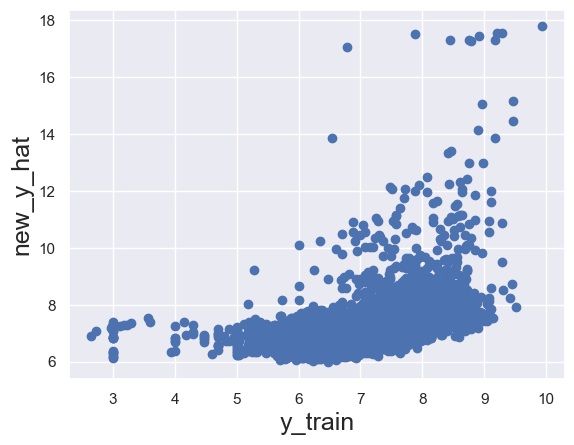

In [58]:
plt.scatter(y_train,new_y_hat)
plt.xlabel('y_train',size=18)
plt.ylabel('new_y_hat',size=18)
plt.show()

In [59]:
reg.score(new_x_train,y_train)

0.40659288480195177

線形回帰を実行する

In [60]:
reg=LinearRegression()
reg.fit(scaled_x_train,y_train)

LinearRegression()

In [61]:
y_hat=reg.predict(scaled_x_train)

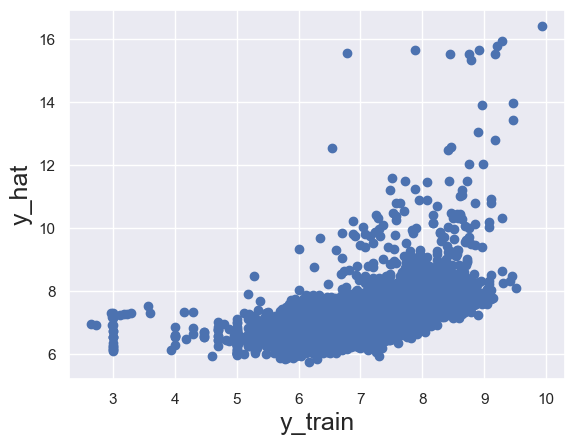

In [62]:
plt.scatter(y_train,y_hat)
plt.xlabel('y_train',size=18)
plt.ylabel('y_hat',size=18)
plt.show()

In [63]:
reg.score(scaled_x_train,y_train)

0.6196827572427731

In [64]:
reg.score(scaled_x_test,y_test)

0.6226883447388949